In [1]:
import dipy

In [2]:
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs

In [3]:
from fenics import *
from mshr import *
#from math import pi, sin, cos, sqrt
import math
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [4]:
fname = 'dMRI_data/ss-ras_data.nii.gz' 
bval_fname = 'dMRI_data/ss-ras.bval' 
bvec_fname = 'dMRI_data/ss-ras.bvec'

data, affine = load_nifti(fname)
bvals, bvecs = read_bvals_bvecs(bval_fname, bvec_fname)
print('data.shape (%d, %d, %d, %d)' % data.shape)

data_float = data.astype(np.float32)

dataMaxVal = int(max(data.flatten()))
dataMinVal = int(min(data.flatten()))

print('b values: ', bvals)
print('b vectors: ', bvecs)

data.shape (104, 104, 72, 32)
b values:  [  0. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700. 700. 700. 700.   0. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700.]
b vectors:  [[ 0.          0.          0.        ]
 [ 0.22293058 -0.49968055 -0.83703119]
 [-0.17871778 -0.49333411 -0.85128242]
 [-0.37542525 -0.14225766 -0.91587037]
 [ 0.41157657 -0.72193778 -0.556247  ]
 [ 0.19853516 -0.93616748 -0.29012811]
 [ 0.84751403 -0.52907634 -0.04240569]
 [ 0.73912424 -0.51868695 -0.42972025]
 [ 0.43850514 -0.15385152 -0.88546205]
 [ 0.75664991 -0.17243032 -0.63067305]
 [ 0.62896943 -0.74815804  0.21132247]
 [ 0.30347744 -0.94898587  0.0855993 ]
 [ 0.28489485 -0.54959691  0.78535217]
 [ 0.62077832 -0.54730117  0.56133366]
 [ 0.97062433 -0.19699152  0.13814011]
 [ 0.83273727 -0.20222756  0.51541471]
 [-0.03439669 -0.75075191  0.65968806]
 [-0.02572841 -0.94997877  0.31125325]
 [-0.68088585 -0.5256443   0.50999278]
 [-0.36761704 -0.53581387  0.76010603]
 [-

In [5]:
#center = Point(0.0, 0.0, 0.0)
#sphere = Sphere(center,1.0)
#mesh = generate_mesh(sphere,20) # 20 specify the resolution of the mesh
#plot(mesh)

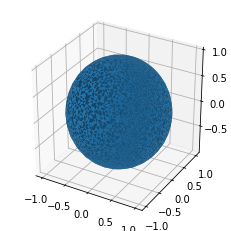

In [6]:
# Mesh and function space
sphere = Sphere(Point(0.0, 0.0, 0.0), 1.0)
vmesh = generate_mesh(sphere, 40)
mesh = BoundaryMesh(vmesh, "exterior")
plot(mesh)

In [7]:
print(mesh.topology().dim())

2


In [8]:
#V = FunctionSpace(mesh, "CG", 1)
#V = FunctionSpace(mesh, "P", 1)

# Build function space with Lagrange multiplier
P1 = FiniteElement("P", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)

#bc1 = DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1)
#bc22 = DirichletBC(V, Constant(90.0), boundary22)
#bc14 = DirichletBC(V, Constant(10.0), boundary14)
#bc29 = DirichletBC(V, Constant(160.0), boundary29)
#bc17 = DirichletBC(V, Constant(200.0), boundary17)
#bc20 = DirichletBC(V, Constant(260.0), boundary20)

# Collect boundary conditions
#bcs = [DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1), DirichletBC(V, Constant(data_float[63,54,30,14]), boundary14)]
#bcs = [DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1, method="pointwise"), 
#       DirichletBC(V, Constant(data_float[63,54,30,14]), boundary14, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,17]), boundary17, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,20]), boundary20, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,22]), boundary22, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,29]), boundary29, method="pointwise"),]

# Coordinates of all dofs in the mixed space
#Wdofs_x = W.dofmap().tabulate_all_coordinates(mesh).reshape((-1, 2))
#Wdofs_x = W.tabulate_dof_coordinates().reshape((-1, 2))
# Dofs of first subspace of the mixed space
#V0_dofs = W.sub(0).dofmap().dofs()
# Coordinates of dofs of first subspace of the mixed space
#dof_coords = Wdofs_x[V0_dofs, :] 

# get coordinates of DOFs
dof_coords = W.tabulate_dof_coordinates()
# find nearest DOF:
dof1 = np.argmin(np.linalg.norm(dof_coords - bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1, dof_coords[dof1]))
dof1_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1_sym, dof_coords[dof1_sym]))

dof14 = np.argmin(np.linalg.norm(dof_coords - bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14, dof_coords[dof14]))
dof14_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14_sym, dof_coords[dof14_sym]))

dof17 = np.argmin(np.linalg.norm(dof_coords - bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17, dof_coords[dof17]))
dof17_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17_sym, dof_coords[dof17_sym]))

dof20 = np.argmin(np.linalg.norm(dof_coords - bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20, dof_coords[dof20]))
dof20_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20_sym, dof_coords[dof20_sym]))

dof22 = np.argmin(np.linalg.norm(dof_coords - bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22, dof_coords[dof22]))
dof22_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22_sym, dof_coords[dof22_sym]))

dof29 = np.argmin(np.linalg.norm(dof_coords - bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29, dof_coords[dof29]))
dof29_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29_sym, dof_coords[dof29_sym]))

# now define a DirichletBC at that point
bcs = [DirichletBC(W.sub(0), Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof1][0], y=dof_coords[dof1][1], z=dof_coords[dof1][2]),
                 'pointwise'),
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof1_sym][0], y=dof_coords[dof1_sym][1], z=dof_coords[dof1_sym][2]),
                 'pointwise'),
      
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14][0], y=dof_coords[dof14][1], z=dof_coords[dof14][2]),
                 'pointwise'),
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14_sym][0], y=dof_coords[dof14_sym][1], z=dof_coords[dof14_sym][2]),
                 'pointwise'),
      
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17][0], y=dof_coords[dof17][1], z=dof_coords[dof17][2]),
                 'pointwise'),
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17_sym][0], y=dof_coords[dof17_sym][1], z=dof_coords[dof17_sym][2]),
                 'pointwise'),
      
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20][0], y=dof_coords[dof20][1], z=dof_coords[dof20][2]),
                 'pointwise'),
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20_sym][0], y=dof_coords[dof20_sym][1], z=dof_coords[dof20_sym][2]),
                 'pointwise'),
      
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22][0], y=dof_coords[dof22][1], z=dof_coords[dof22][2]),
                 'pointwise'),
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22_sym][0], y=dof_coords[dof22_sym][1], z=dof_coords[dof22_sym][2]),
                 'pointwise'),
      
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29][0], y=dof_coords[dof29][1], z=dof_coords[dof29][2]),
                 'pointwise'),
      DirichletBC(W.sub(0), Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29_sym][0], y=dof_coords[dof29_sym][1], z=dof_coords[dof29_sym][2]),
                 'pointwise'),
     ]

#u = TrialFunction(V) 
#v = TestFunction(V)
#w = Function(V)      
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)

x = SpatialCoordinate(mesh)
phi = Expression("atan2(x[1],x[0])", degree=2)
theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)


#r = Expression("x[0]", degree=1)
###theta = Expression("x[1]", degree=1)
###phi = Expression("x[2]", degree=1)
#phi = Expression("x[1]", degree=1)
#theta = Expression("x[2]", degree=1)


#r, phi, theta = SpatialCoordinate(mesh)
#x = r * sin(theta) * cos(phi)

#lamb = .6     
#f = Expression("lamb*(lamb + 1)*(sin(x[2]))**lamb*sin(lamb*x[1])", lamb=lamb) 
f = Constant(0.0)

#Weak formulation

#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx
#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = (u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/sin(theta)**2)*(u.dx(2)*v.dx(2))
#a = (a2+a3)*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
##a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
##a5 = (Constant(2.)/r)*u.dx(0)*v
##a = (a1+a2+a3-a4-a5)*dx
#a = (a1+a2+a3)*dx

#Different weak formulation
## Defining spherical coordinates
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
#theta = Expression("atan2(x[1],x[0])", degree=2)
#phi = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
#a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
#a5 = (Constant(2.)/r)*u.dx(0)*v
#a = (a1+a2+a3-a4-a5)*dx

#Different weak formulation for shpere surface
## Defining spherical coordinates
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
#phi = Expression("atan2(x[1],x[0])", degree=2)
#theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#theta = Expression("atan2(x[1],x[0])", degree=2)
#phi = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)

a2 = u.dx(1)*v.dx(1)
a3 = (Constant(1.)/sin(theta)**2)*(u.dx(2)*v.dx(2))
a4 = (cos(theta)/sin(theta))*u.dx(1)*v
a5 = u*d + c*v
a = (a2+a3-a4+a5)*dx
#a1 = (sin(theta)*sin(theta)*sin(phi)*sin(phi)+cos(theta)*cos(phi)/sin(theta))*(u.dx(0)*v.dx(0))
#a2 = (cos(theta)*cos(theta)*sin(phi)*sin(phi)+cos(phi)*cos(phi))*(u.dx(1)*v.dx(1))
#a3 = (sin(phi)**2/sin(theta)**2)*(u.dx(2)*v.dx(2))
#a4 = (-sin(theta)*sin(phi)*sin(phi)*cos(theta)+cos(theta)*cos(phi)*cos(phi)*sin(theta))*(u.dx(0)*v.dx(1))
#a5 = (-cos(theta)*cos(phi)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (-cos(theta)*sin(phi)*sin(phi))*(u.dx(1)*v.dx(2))
#a7 = (cos(theta)*sin(phi))*(u.dx(0)*v)
#a8 = (-cos(theta)*cos(theta)*sin(phi)/sin(theta))*(u.dx(1)*v)            
#a = (a1+a2+a3+a4+a5+a6+a7+a8)*dx

#Different weak formulation
#a1 = (Constant(1.0)+((cos(theta)/sin(theta))-1)*cos(phi)**2)*(u.dx(0)*v.dx(0))
#a2 = u.dx(1)*v.dx(1)
#a3 = (cos(phi)**2+(sin(phi)**2/sin(theta)**2))*(u.dx(2)*v.dx(2))
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12)*dx


#Different weak formulation
#a1 = u.dx(0)*v.dx(0)
#a2 = u.dx(1)*v.dx(1)
#a3 = u.dx(2)*v.dx(2)
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a10+a11+a12)*dx

#L = inner(f,v)*dx
L = f*v*dx
#L = Constant(0.0)

#for bc in bcs: 
#    bc.apply(a,L)
    
#solve(a == L, w, bc)

w = Function(W)      
solve(a == L, w, bcs)
(u, c) = w.split()

dof 2972, x = [ 0.22500091 -0.49897937 -0.82871851]
dof 1163, x = [-0.21674553  0.4798845   0.84299239]
dof 3796, x = [ 0.9674628  -0.18492114  0.14830699]
dof 511, x = [-0.96248462  0.2212522  -0.13706849]
dof 1355, x = [-0.04732124 -0.94653692  0.30478168]
dof 2817, x = [ 0.03172092  0.94304491 -0.31772755]
dof 2709, x = [-0.14077015  0.23135346 -0.95974622]
dof 1531, x = [ 0.17246078 -0.18623442  0.96241032]
dof 738, x = [-0.24076205 -0.18526457  0.94819394]
dof 3410, x = [ 0.22738011  0.1752173  -0.95370044]
dof 333, x = [-0.85124125 -0.49881768 -0.12597316]
dof 3863, x = [0.86854185 0.4768401  0.1013386 ]


In [9]:
# Save solution to file in VTK format
vtkfile = File('LH/solution.pvd')
vtkfile << u

In [10]:
array_u = nodal_values_u = u.vector()
vertex_values_u = u.compute_vertex_values()

In [11]:
print(array_u)

In [12]:
for i in range(len(array_u)):
    print(array_u[i])

9.227401482718019
9.224616234193812
6.915657228204191
7.706857322839512
9.357577395570766
10.862675308841162
6.955069538440968
9.122098091379609
11.509265267523743
13.906005296820423
14.064585231125474
11.713505751003122
10.829265377498594
7.9507389940653255
6.290070487538482
6.282784715988901
5.235486202361034
4.916632492260882
6.966153418383923
8.356907818578062
10.63001230745736
13.008642538233675
16.238008888277253
15.914070889448324
16.363752416406818
16.241205342833315
13.650707490479373
13.053627724009564
10.797264508732708
8.903458222366151
7.106214895251
5.942430227938086
4.554124550833204
3.546763765903761
3.607251183925144
4.968619659772289
5.213611542270652
3.7395177471047485
2.8117513001658705
1.887030574506658
2.697087719668612
2.764930516376921
2.9389969787872205
3.9420641678469712
5.265323104469322
6.439054252585656
8.387215009262636
10.049664277282032
12.969565388633761
15.315178599224039
15.276263316592742
19.00070406372818
19.45858692450789
18.35527474323331
19.06546

2.8568082800368275
1.305469849254923
-4.265113718592171
-5.451766238754268
-6.1490022318673265
-6.925901403781234
-7.52161279199863
-7.484999498386608
-7.7640554414821965
-7.03390465101953
-7.330284575964834
-7.532397159099254
-6.246996493241863
-5.478110414801881
-3.296733567393091
-2.924908047903848
-0.583607699774068
1.9430611811116674
4.041868700006927
7.870386433454875
11.177227376035018
13.01757286372301
13.362186656185836
19.39286787144079
24.321116704757248
26.667886078126607
34.92310345156879
43.69824219718797
40.02107228701914
30.11402634186371
31.975552621072328
34.3266505797635
27.751032380046347
24.60365679324547
25.473932746988112
23.985157096134838
23.384980614590077
21.43375991612662
19.556311151934874
21.516279670778367
20.799573823488206
20.290450211442256
22.300984370888642
24.8683594140084
24.588659154161416
23.026817159081734
21.897158728593293
17.809170776438293
15.127443865556325
19.036600162223905
19.47717989744395
11.554577201410304
17.73988381270904
14.0323207

-2.574906943228405
-1.0238602349220403
0.7295289230163413
-1.4274663235794367
-0.9094151744304435
-0.6049004887376106
-17.870934231097973
-21.08892159112587
-22.689285013009677
-23.56394844427126
-24.687212100582506
-23.760961631169106
-23.01311587055009
-22.52180152273206
-19.786429727878105
-18.274467935644356
-14.830361299645475
-10.74324189258278
-6.578766522482215
-2.069955401927334
6.883690585960041
6.42863944746152
30.867333610156763
83.0
29.180262164352417
26.273177474148927
26.742146663006267
26.35577969966488
26.132681677756928
21.048980810618456
16.004812732569967
15.625354838297785
12.800539746163318
8.785396503449595
4.656079994281023
2.21059542912212
1.8842056829488674
-0.15454434744437712
-2.187051191833692
-3.672341810133826
-6.803002291491918
-7.980369392231968
-9.560123456349785
-11.279163091696166
-11.776066597457154
-14.257556328886443
-15.748266805146065
-17.563839984109517
-17.460750728208307
-17.915756726314523
6.068537835429814
13.594332822261713
14.822472542168

-17.3610027224502
-16.795056257205513
-16.034736356762416
-14.878757882963937
-14.244333429476104
-12.976360057049616
-11.353755572906898
-10.582637813241181
-9.617036027091299
-8.26613065658382
-7.86292863350426
-6.936786105055564
-6.022302912442859
-4.757991049394257
-4.288258182859769
-2.9124450307910195
-1.119049548814542
-1.5689831264999208
-0.31807568089005683
-0.8578956515549376
-0.7057219427070596
-2.4457703731297142
-3.5581932010700044
-4.531153521008029
-5.151469144186834
-6.20425337389177
-7.407026634780827
-8.596174750161037
-9.428553566390999
-10.774298368321803
-12.710369967782139
-14.025252149206091
-15.81053086631305
-17.91197870053582
-21.830025279212183
-26.64806021575944
-4.103221083905694
-22.756751150214566
-19.91301825358697
-18.339670087212887
-15.85056179891465
-15.53010544179245
-13.351153874078278
-13.757170736626765
-11.872911405654955
-9.655046238999695
-8.26177676573346
-7.305083134308268
-6.444500793747501
-5.388978740359526
-4.19317642765487
-3.8283295239

-11.772811732330943
-10.778295065470523
-8.547886785027602
-7.6158758638562825
-5.8629319400012285
-3.4187291043203607
-2.9602266200977594
-2.5158042458537437
-1.6932484710369728
-0.05143230310270735
-0.9829743444927028
0.7735076146453199
1.2927339024967328
2.3450206316239117
1.9489518965639956
1.6866094291121156
1.9882176090404138
-15.507299479772948
-10.05825812661468
-12.851253360097472
-12.036296169447855
-17.77508910442734
-18.095407816321977
-21.10145172856215
-20.153311259840613
-19.978486653887032
-23.357546891689744
-25.10943059746559
-22.880039109999394
-23.860179145642206
-25.538878446481235
-26.957428922113323
-27.278156027921256
-27.004634422534068
-22.221216656498186
-17.533123257598906
-14.837309951992262
-6.130233131440479
-12.480193939591791
3.2089473820803947
23.79800115693309
9.521666526894457
27.727041250515878
26.48437768962619
33.35920173123519
39.89195537442619
-6.3272257298676156
-3.1186760765080943
-1.269059645512995
2.637639024293613
4.9974467012135895
3.62268

24.636651340791325
28.616858469787857
33.987774284688925
40.849174576805
34.0464718532165
31.9219941710153
33.15774955933044
29.926385613024433
27.30013399259261
24.79114035364178
23.358594967504967
23.535825458682833
23.449279093841735
27.71136310970863
31.39909808475254
37.87027423053596
42.48774528268803
43.86951684059412
38.14218599611911
29.397686582822253
24.067412978085205
19.7332369693663
14.740977562264385
11.912852761803281
7.988817286705756
3.3412043274201335
1.2449516201123068
-1.0498871253833284
-1.278463030341432
13.29362983844033
-3.4746847174709057
-2.1969884993446542
-0.7833510162108905
1.2143877557859504
3.0370244525861394
5.52828058589231
10.273465189045488
12.038917889549463
13.451838333140618
14.014748843517001
7.70635771872179
2.887384275264699
0.24299380740427762
0.8482870598625895
-1.4729801725557459
-2.9852358871676015
-4.257775275229636
-4.378178632074415
-5.574748534459399
-6.431611501619585
-7.327762209793611
-8.210431696450925
-8.777762506911898
-9.15202176

In [13]:
min(array_u)

-30.872793455741853

In [14]:
len(array_u)

4162

In [15]:
bvecs[1][0]

0.22293058

In [16]:
bvecs[1][2]

-0.83703119

In [17]:
data_float[60,50,56,1]

51.0

In [18]:
data_float[60,50,56,14]

90.0

In [19]:
data_float[60,50,56,17]

92.0

In [20]:
data_float[60,50,56,20]

83.0

In [21]:
data_float[60,50,56,22]

54.0

In [22]:
data_float[60,50,56,29]

106.0

In [23]:
#error_L2 = errornorm(u_D, w, 'L2')
#vertex_values_u_D = u_D.compute_vertex_values(mesh)
#vertex_values_u = w.compute_vertex_values(mesh)
#error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
#print(error_max)
#print(error_L2)

In [24]:
bvecs[27]

array([-0.70739847, -0.15345097, -0.68995672])

In [25]:
x_point = Point(*[bvecs[27]])
mesh.bounding_box_tree().compute_first_entity_collision(x_point)

4294967295

In [26]:
#mesh.bounding_box_tree().compute_closest_point(x_point)

In [27]:
def project_point_onto_affine_subspace(p, V):
    """Projects a point onto an affine subspace

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points / affine subspaces
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of affine subspace

    For a single point / affine subspace:
        - p is the point in R^N to be projected onto the affine subspace
        - The affine subspace is the set of all affine combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points / affine subspaces, each point is
    projected onto its corresponding affine subspace
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith affine subspace

    Example usage:
        import numpy as np
        spatial_dim = 3
        p1 = np.random.randn(spatial_dim)
        V1 = np.array([[2., 0., 0.],
                      [2., 1., 0.],
                      [2., 0., 1.]])
        p2 = np.random.randn(spatial_dim)
        V2 = np.array([[0., 3., 0.],
                       [1., 3., 0.],
                       [0., 3., 1.]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p, affine_coordinates = project_point_onto_affine_subspace(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        print('p1=', p1)
        print('projected_p1=', projected_p1)
        print('p2=', p2)
        print('projected_p2=', projected_p2)
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    if k == 1:
        affine_coordinates = np.ones((num_pts, 1))
    else:
        VV0 = VV[:, 0, :].reshape((num_pts, 1, N))
        dVV = VV[:, 1: :].reshape((num_pts, k-1, N)) - VV0
        dPP = PP.reshape((num_pts, 1, N)) - VV0

        if k == 2:
            PHI = np.sum(dVV * dVV, axis=-1).reshape((num_pts))
            RHS = np.sum(dVV * dPP, axis=-1).reshape((num_pts))
            cc_rest = (RHS / PHI).reshape((num_pts, 1))
        else:
            PHI = np.einsum('xiz,xjz->xij', dVV, dVV) # shape = (num_pts, k-1, k-1)
            iPHI = np.linalg.inv(PHI) # shape = (num_pts, k-1, k-1)

            RHS = np.sum(dVV * dPP, axis=-1)  # shape = (num_pts, k-1)
            cc_rest = np.einsum('pij,pj->pi', iPHI, RHS)  # shape = (num_pts, k-1)

        cc_first = (1. - np.sum(cc_rest, axis=1)).reshape((num_pts, 1))
        affine_coordinates = np.concatenate([cc_first, cc_rest], axis=1) # shape = (num_pts, k)

    PP_projected = np.einsum('pi,pij->pj', affine_coordinates, VV) # shape = (num_pts, N)

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
        affine_coordinates = affine_coordinates.reshape(-1)
    return PP_projected, affine_coordinates

def powerset(s):
    # NOT MY CODE. FROM USER "hughdbrown" ON STACKOVERFLOW HERE:
    # https://stackoverflow.com/a/1482320/484944
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

def closest_point_on_simplex(p, V):
    """Projects a point onto a simplex (triangle, tetrahedron, etc)

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points/simplices
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of simplex

    For a single point/simplex:
        - p is the point in R^N to be projected onto the simplex
        - The simplex is the set of all convex combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points/simplices, each point is
    projected onto its corresponding simplex
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith simplex

    Example usage:
        import numpy as np
        import matplotlib.pyplot as plt
        p1 = np.array([1.1, 0.4])
        V1 = np.array([[0., 0.],
                       [0., 1.],
                       [1., 0.]])
        p2 = np.array([-0.3, 1.1])
        V2 = np.array([[-1.0, 0.],
                       [0.,   0.],
                       [-0.5, 0.5]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p = closest_point_on_simplex(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        plt.figure()
        t1 = plt.Polygon(V1)
        plt.gca().add_patch(t1)
        plt.plot([p1[0], projected_p1[0]],
                 [p1[1], projected_p1[1]], 'r')
        t2 = plt.Polygon(V2)
        plt.gca().add_patch(t2)
        plt.plot([p2[0], projected_p2[0]],
                 [p2[1], projected_p2[1]], 'r')
        plt.gca().set_aspect('equal')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    subsets = list(powerset(list(range(k)))) # e.g., [[], [0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]]
    QQ = list()
    CC = list()
    for s in subsets:
        if s:
            simplicial_facet = VV[:,s,:]
            Q, C = project_point_onto_affine_subspace(PP, simplicial_facet)
            QQ.append(Q)
            CC.append(C)

    distances = np.stack([np.linalg.norm(Q - PP, axis=-1) for Q in QQ]) # shape=(num_facets, num_pts)

    good_inds = np.stack([(np.all(0. <= C, axis=1) & np.all(C <= 1., axis=1)) for C in CC]) # shape=(num_facets, num_pts)
    bad_inds = np.logical_not(good_inds)
    distances[bad_inds] = np.inf
    closest_inds = np.expand_dims(np.argmin(distances[:, :, None], axis=0), axis=0)

    QQ_stack = np.stack(QQ) # shape=(num_facets, num_pts, N)
    PP_projected = np.take_along_axis(QQ_stack, closest_inds, axis=0)[0,:,:]

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
    return PP_projected

def closest_point_in_mesh(p, mesh):
    """Finds the nearest point in a mesh to a given point
    p is the point or points (numpy array)
    mesh is the fenics/dolfin mesh

    p.shape = (N,) OR (num_pts, N) for vectorization over many points
    N = dimension of ambient space

    Example usage:
        import numpy as np
        import dolfin as dl
        import matplotlib.pyplot as plt
        mesh = dl.UnitSquareMesh(13,9)
        num_pts = 20
        p = np.random.randn(num_pts, 2) + np.array([0.5, 0.5])
        closest_p = closest_point_in_mesh(p, mesh)
        plt.figure()
        dl.plot(mesh)
        for ii in range(num_pts):
            plt.plot([p[ii,0], closest_p[ii,0]], [p[ii,1], closest_p[ii,1]], 'b')
            plt.plot(p[ii,0], p[ii,1], '*k')
            plt.plot(closest_p[ii,0], closest_p[ii,1], '.r')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p[None,:]
    else:
        PP = p
    num_pts, N = PP.shape
    tdim = mesh.topology().dim()
    k = tdim + 1

    VV = np.zeros((num_pts, k, N))
    bbt = mesh.bounding_box_tree()
    for ii in range(num_pts):
        pi = PP[ii,:]
        closest_entity, closest_distance = bbt.compute_closest_entity(Point(pi))
        closest_cell = mesh.cells()[closest_entity]
        vertices_of_closest_cell = mesh.coordinates()[closest_cell, :]
        VV[ii, :, :] = vertices_of_closest_cell

    closest_PP = closest_point_on_simplex(PP, VV)

    if len(p.shape) == 1:
        closest_PP = closest_PP.reshape(-1)
    return closest_PP

In [28]:
closest_p = closest_point_in_mesh(bvecs[27], mesh)
print(bvecs[27])
print(closest_p)
print(w(closest_p))

[-0.70739847 -0.15345097 -0.68995672]
[-0.54665753 -0.49758491 -0.66623299]
[-9.51902868 77.89629892]


In [29]:
closest_p = closest_point_in_mesh(-bvecs[27], mesh)
print(-bvecs[27])
print(closest_p)
print(w(closest_p))

[0.70739847 0.15345097 0.68995672]
[0.70232778 0.1522543  0.68523272]
[ 1.2759755  77.89629892]


In [30]:
array_1 = np.array([[1, 2, 7], [3, 4, 8]])

In [31]:
array_2 = np.array([[1, 2], [3, 9], [4, 16]]) 

In [32]:
np.dot(array_1, array_2)

array([[ 35, 132],
       [ 47, 170]])